In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import seaborn as sns
import random
import warnings

In [2]:
# simulate data for classification 
X, y = make_classification(n_samples = 500,
                                       n_features = 5,
                                       n_informative = 2,
                                       n_redundant = 2,
                                       n_classes = 2,
                                       random_state = 888
                                       )

In [3]:
# check feature matrix
print("Feature Matrix: ");
print(pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"]).head())

Feature Matrix: 
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5
0  -0.980745   1.397817   0.097420   1.816219   2.255405
1   0.272650   0.952904  -0.120022   1.258919   1.577617
2  -0.280564   1.366616   0.605139   1.718828   2.095423
3   0.762558   0.585822   0.218204   0.741397   0.907096
4  -0.173253   0.050620  -1.965157   0.285270   0.504989


In [4]:
# check labels 
print("class_label: ");
print(pd.DataFrame(y, columns=["class_label"]).tail())

class_label: 
     class_label
495            0
496            0
497            1
498            0
499            1


In [10]:
# obtain a dataframe
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5"])
class_label = pd.DataFrame(y, columns=["class_label"])
df['class_label'] = class_label
df.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,class_label
0,-0.980745,1.397817,0.097420,1.816219,2.255405,1
1,0.272650,0.952904,-0.120022,1.258919,1.577617,1
2,-0.280564,1.366616,0.605139,1.718828,2.095423,1
3,0.762558,0.585822,0.218204,0.741397,0.907096,1
4,-0.173253,0.050620,-1.965157,0.285270,0.504989,1


In [11]:
# check how many cases belong to each class 
df['class_label'].value_counts()

1    250
0    250
Name: class_label, dtype: int64

In [12]:
# divide the data into training and test subsets, separate the label 
from sklearn.model_selection import train_test_split
y = df[['class_label']]
X = df.drop(['class_label'], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=888)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) # check the shape 

(350, 5) (350, 1) (150, 5) (150, 1)


In [14]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [15]:
# proceed with grid search to find optimal parameters for the model 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

estimator = xgb.XGBClassifier()
parameters = {'colsample_bytree': [0.1, 0.3, 0.5],
                'n_estimators': [100, 200, 10],
                'max_depth': [3, 15],
                'learning_rate': [0.1, 0.01, 0.05],}
gs = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=10)
tune_results = gs.fit(X_train, y_train)

#Get best hyperparameter results
gs.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.05,
 'max_depth': 15,
 'n_estimators': 200}

In [16]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [17]:
# tuned model 
tuned_xgb = xgb.XGBClassifier(learning_rate = 0.05, colsample_bytree = 0.5, n_estimators = 200, max_depth = 15)
model = tuned_xgb.fit(X_train, y_train)

# make predictions on the test set
y_preds = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:,1]

acc_score = metrics.accuracy_score(y_test.values, y_preds)
auc_score = metrics.roc_auc_score(y_test, y_probs)


In [18]:
# accuracy 
acc_score

0.9266666666666666

In [19]:
# AUC score 
auc_score

0.9802193850026973

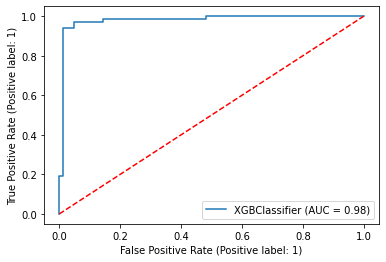

In [ ]:
# AUC plot 
metrics.plot_roc_curve(gs.best_estimator_, X_test, y_test)
plt.plot([0, 1], [0, 1], "r--");